# Exercício 7 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9580121040344238, 2.452310465951541e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SeventhMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0          1         2          3
0 -0.293662   5.338219 -0.450294  -1.638023
1  1.314015  -3.373279  1.739757  -5.132907
2 -5.573339  -1.736645  9.580465 -12.773851
3 -4.226771  19.799658  2.510886   0.988586
4 -0.834116  -8.201934  4.744578 -11.034271


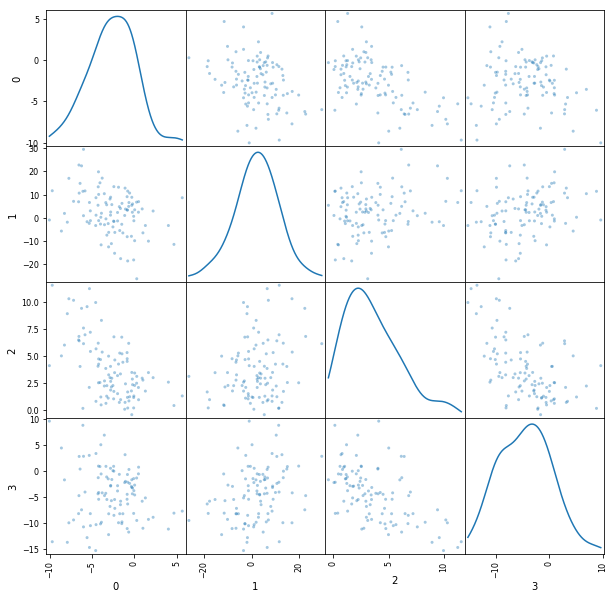

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1547,0.1151,0.9876,0.47921
1,-0.0082,0.1693,0.9915,0.78489
2,-0.1173,0.6747,0.9286,4.1565e-05
3,0.0002,0.1181,0.9883,0.52801


## NPCA-RLS Algorithm

In [62]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, learningRate = 1e-3, decayRate = 1e-6,runs = 100)

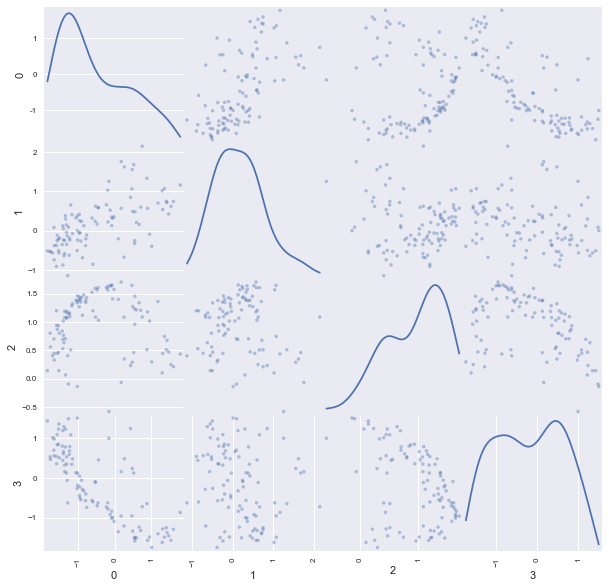

In [63]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,-0.0882,0.3994,0.9125,5.784e-06
1,0.0794,0.1235,0.9721,0.03229
2,-0.0784,0.5172,0.9435,0.00031873
3,-0.0921,0.4407,0.9529,0.0012975


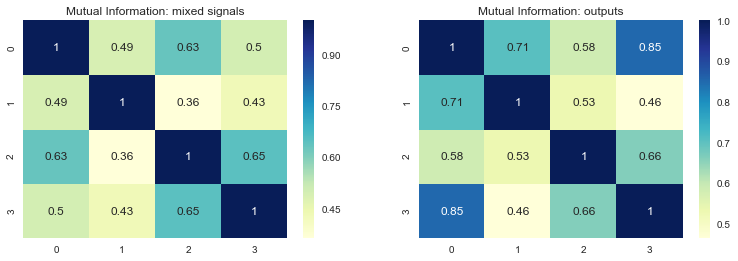

In [64]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [41]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1, decayRate = 1e-7, runs  = 100) 

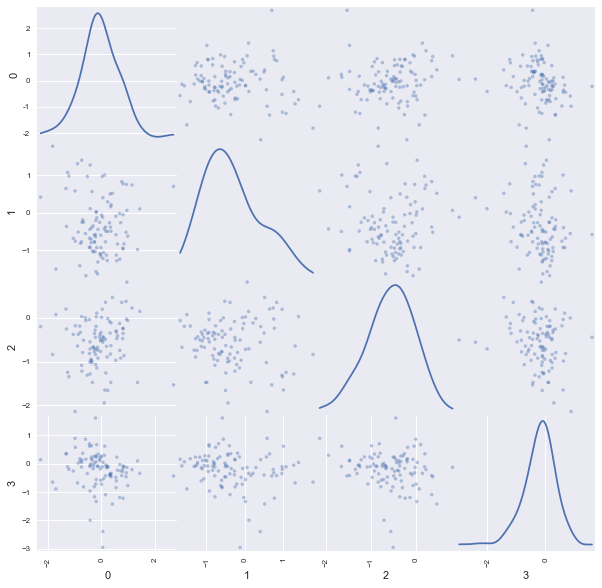

In [42]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2714,0.1947,0.978,0.093487
1,0.0037,0.0913,0.9625,0.0060848
2,0.1423,0.1027,0.9915,0.78205
3,0.538,0.3241,0.9181,1.1214e-05


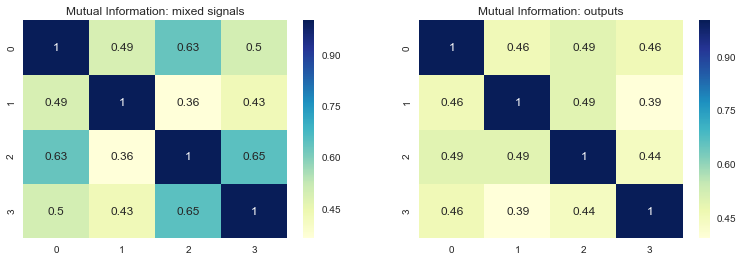

In [43]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [29]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-2, runs = 100)

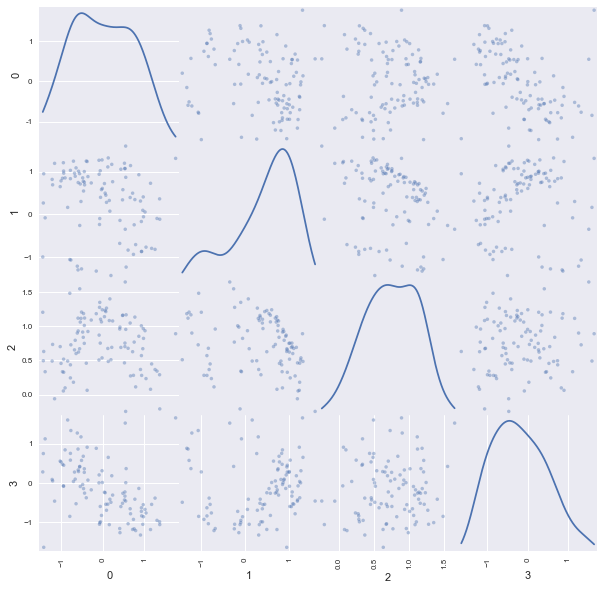

In [30]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,-0.1526,0.0712,0.9755,0.058983
1,-0.0209,0.4612,0.9068,2.9836e-06
2,-0.1588,0.0615,0.9874,0.4662
3,-0.0999,0.1978,0.9762,0.066701


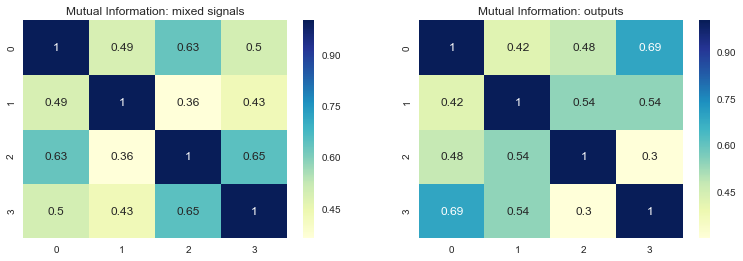

In [31]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)